## Q2
Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [6]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [7]:
z= pd.read_csv(r"C:\Users\hp\Downloads\Data_Sets\crime_data.csv")
#print(z)
z.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
z.info

<bound method DataFrame.info of         Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      

In [5]:
z.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
z.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [14]:
#z['Unnamed: 0'].unique()
z['Unnamed: 0'].value_counts()

New Jersey        1
Pennsylvania      1
Nebraska          1
Arkansas          1
South Dakota      1
Iowa              1
Indiana           1
Missouri          1
Vermont           1
Florida           1
Mississippi       1
North Dakota      1
Maryland          1
Minnesota         1
Kentucky          1
Georgia           1
Rhode Island      1
New Mexico        1
Oklahoma          1
New Hampshire     1
Washington        1
Utah              1
Wisconsin         1
North Carolina    1
Illinois          1
Arizona           1
Massachusetts     1
California        1
Oregon            1
Nevada            1
Texas             1
Virginia          1
Montana           1
West Virginia     1
Tennessee         1
Connecticut       1
Idaho             1
Alaska            1
Alabama           1
Colorado          1
Wyoming           1
New York          1
Maine             1
Louisiana         1
Kansas            1
South Carolina    1
Michigan          1
Ohio              1
Delaware          1
Hawaii            1


In [ ]:
# HISTOGRAM PLOT
plt.hist(z.Murder, color="purple", edgecolor="black")
plt.title("Murder")
plt.show()

In [ ]:
plt.hist(z.Assault, color="orange", edgecolor="black")
plt.title("Assault")
plt.show()


In [ ]:
plt.hist(z.UrbanPop, color="indigo", edgecolor="white")
plt.title("UrbanPop")
plt.show()


In [ ]:
plt.hist(z.Rape, color="red", edgecolor="black")
plt.title("Rape")
plt.show()


In [ ]:
# BOX PLOT
plt.boxplot(z.Murder)
plt.title("Murder")
plt.show()

In [ ]:
plt.boxplot(z.Rape)
plt.title("Rape")
plt.show()

In [ ]:
plt.boxplot(z.UrbanPop)
plt.title("UrbanPop")
plt.show()

In [ ]:
plt.boxplot(z.Assault)
plt.title("Assault")
plt.show()

In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)

z_norm =norm_func(z.iloc[:,1:])
z_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


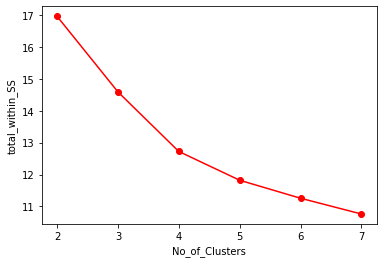

In [10]:
###### scree plot or elbow curve ############
k = list(range(2,8))
# variable for storing total within sum of squares for each kmeans 
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(z_norm)
    # variable for storing within sum of squares for each cluster 
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(z_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,z_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

In [11]:
# by giving diffrent values of k we finalise at (2,8)
# and get on a result that at 4th cluster our loss fuction value is minimum so we consider it our ideal cluster

# K-MEANS

In [12]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) # 4 = Hypoperameter we are choosing =k
model.fit(z_norm) # we fit our normalised dataset to the model

model.labels_ # getting the labels of clusters assigned to each row 
# i.e the oth record/row belongs to oth cluster 

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [13]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
z['clust']=model.labels_ # creating a  new column and assigning it to new column 
#print(z)
z.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [14]:
z.shape

(50, 6)

In [15]:
#z['clust'].unique()
z.clust.value_counts()

3    17
1    13
0    12
2     8
Name: clust, dtype: int64

In [16]:
z.iloc[:,1:5].groupby(z.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


# HIERARCHICAL

In [17]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

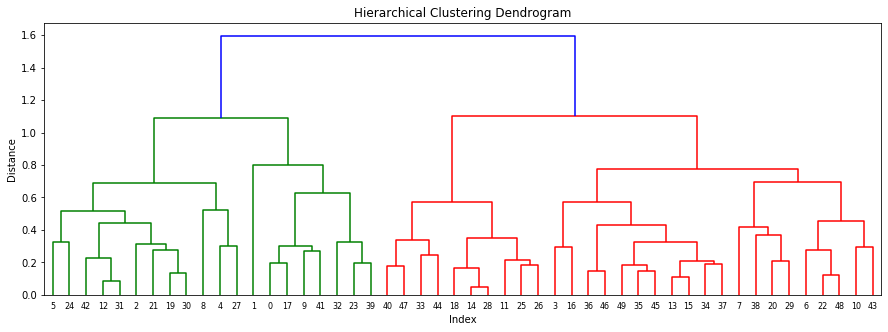

In [18]:
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(z_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(z_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#p = np.array(df_norm) # converting into numpy array format 
Z = linkage(z_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    Z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [7]:
# Now applying AgglomerativeClustering choosing 4 as clusters from the dendrogram(optional)
from sklearn.cluster import	AgglomerativeClustering 

h_complete = AgglomerativeClustering( n_clusters=4, linkage='complete', affinity = "euclidean").fit(z_norm) 


cluster_labels=pd.Series(h_complete.labels_) 

h_complete.labels_    ## this is where we have the labels associated with each and every row

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [8]:
# creating a  new column and assigning it to new column 

z['clust']=cluster_labels
#print(z)
z.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [10]:
z_new = z.iloc[:,[5,0,1,2,3,4]]
z_new.head(10)

,clust,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,3,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,3,California,9.0,276,91,40.6
5,3,Colorado,7.9,204,78,38.7
6,1,Connecticut,3.3,110,77,11.1
7,1,Delaware,5.9,238,72,15.8
8,3,Florida,15.4,335,80,31.9
9,0,Georgia,17.4,211,60,25.8


In [11]:
# getting aggregate mean of each cluster
z_new.iloc[:,2:].groupby(z_new.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500
